# **EXERCISE**

1. Cari data di kaggle yang merupakan kasus klasifikasi.
2. Identifikasi masalah pada data yang didapatkan. Apakah terdapat anomali? Jika ada coba ditanggulangi.
3. Buatlah model denga menggunakan algoritma:
    - a. KNN (menggunkan best K)
    - b. LogReg
    - c. Decission Tree (menggunakan best Max Depth)
    - d. SVM (menggunakan best kernel - read documentation)
    - Jangan lupa untuk melakukan implementasi Encoding ataupun Scaling jika memang dibutuhkan
4. Dari 4 model di atas, model mana yang paling baik? berikan alasan!

In [177]:
import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report

- Pregnancies                 : Number of times pregnant
- Glucose                     : Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure               : Diastolic blood pressure (mm Hg)
- SkinThickness               : Triceps skin fold thickness (mm)
- Insulin                     : 2-Hour serum insulin (mu U/ml)
- BMI                         : Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction    : Diabetes pedigree function
- Age                         : Age (years)
- Outcome                     : Class variable (0 or 1) 268 of 768 are 1, the others are 0

## DATA PREPARATION

In [178]:
dfRaw = pd.read_csv('diabetes.csv')
df = dfRaw.copy()
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [179]:
display(df.info(),df.describe(),df.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [180]:
len(df)

768

### HANDLING N/A VALUE

In [181]:
def zeroToNA(data,feature):
    data.loc[data[feature] == 0, feature] = np.nan

In [182]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [183]:
for i in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI']:
    zeroToNA(df,i)


In [184]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [185]:
#Glucose& & BMI -> SimpleImputer()

imp_simp = SimpleImputer(strategy='median')
df[['Glucose','BMI']]= imp_simp.fit_transform(df[['Glucose','BMI']])

In [186]:
# BloodPressure -> Using KNN

imp_KNN = KNNImputer() #default: n_neighbors=5
df[['BloodPressure']]= imp_KNN.fit_transform(df[['BloodPressure']])

In [187]:
# Insulin, SkinThickness, Use iterative because 

imp_itr = IterativeImputer() #default: n_neighbors=5
df[['Insulin','SkinThickness']]= imp_itr.fit_transform(df[['Insulin','SkinThickness']])

In [188]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

checking unique Data

In [189]:
for i in df:
    print(f'Feature {i}:\n{df[i].unique()}\n')

Feature Pregnancies:
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Feature Glucose:
[148.  85. 183.  89. 137. 116.  78. 115. 197. 125. 110. 168. 139. 189.
 166. 100. 118. 107. 103. 126.  99. 196. 119. 143. 147.  97. 145. 117.
 109. 158.  88.  92. 122. 138. 102.  90. 111. 180. 133. 106. 171. 159.
 146.  71. 105. 101. 176. 150.  73. 187.  84.  44. 141. 114.  95. 129.
  79.  62. 131. 112. 113.  74.  83. 136.  80. 123.  81. 134. 142. 144.
  93. 163. 151.  96. 155.  76. 160. 124. 162. 132. 120. 173. 170. 128.
 108. 154.  57. 156. 153. 188. 152. 104.  87.  75. 179. 130. 194. 181.
 135. 184. 140. 177. 164.  91. 165.  86. 193. 191. 161. 167.  77. 182.
 157. 178.  61.  98. 127.  82.  72. 172.  94. 175. 195.  68. 186. 198.
 121.  67. 174. 199.  56. 169. 149.  65. 190.]

Feature BloodPressure:
[ 72.          66.          64.          40.          74.
  50.          72.40518417  70.          96.          92.
  80.          60.          84.          30.          88.
  90.          94.      

## DATA MODELING

### SCALING THE FEATURE

In [190]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [191]:
import statsmodels.api as sm 

x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
y = df['Outcome']

# ITERASI ke-2

x = df[['Pregnancies', 'Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']]

sm_log = sm.Logit(y, sm.add_constant(x))
hasil = sm_log.fit()
print(hasil.summary())


Optimization terminated successfully.
         Current function value: 0.464561
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  768
Model:                          Logit   Df Residuals:                      760
Method:                           MLE   Df Model:                            7
Date:                Thu, 15 Jun 2023   Pseudo R-squ.:                  0.2818
Time:                        15:20:05   Log-Likelihood:                -356.78
converged:                       True   LL-Null:                       -496.74
Covariance Type:            nonrobust   LLR p-value:                 1.169e-56
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                       -9.0828      0.811    -11.206      0.000     -10.671

In [192]:
minmax = MinMaxScaler()
stdsclr = StandardScaler()
robstsclr = RobustScaler()

In [193]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,166.983218,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.341389,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.639070,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [194]:
# Pregnancies, Age using MinMax Scaler

x = df[['Pregnancies','Age']]

minmax.fit(x)
x_minmax = minmax.transform(x)
x_minmax = pd.DataFrame(x_minmax, columns=['Pregnancies_scaled','Age_scaled'])
display(x.head())
display(x_minmax.head())

,Pregnancies,Age
0,6,50
1,1,31
2,8,32
3,1,21
4,0,33


,Pregnancies_scaled,Age_scaled
0,0.352941,0.483333
1,0.058824,0.166667
2,0.470588,0.183333
3,0.058824,0.000000
4,0.000000,0.200000


In [195]:
import matplotlib.pyplot as plt
import seaborn as sns

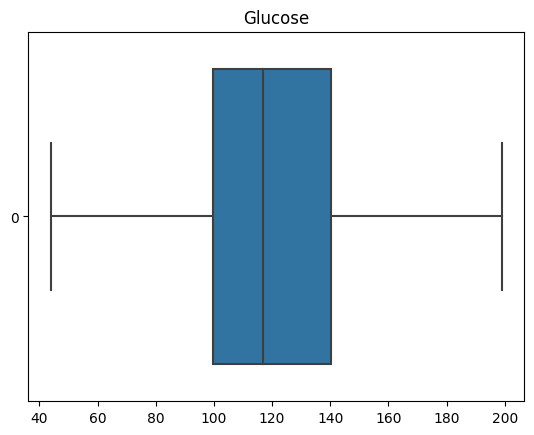

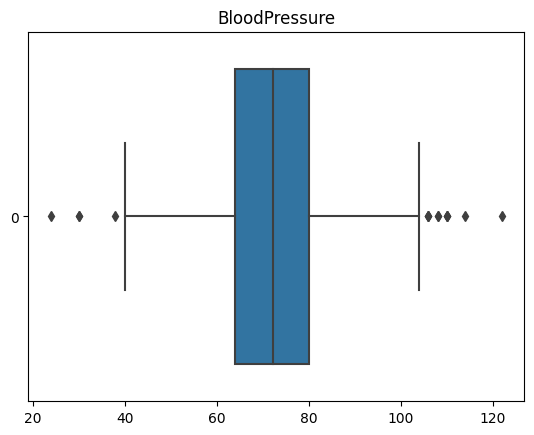

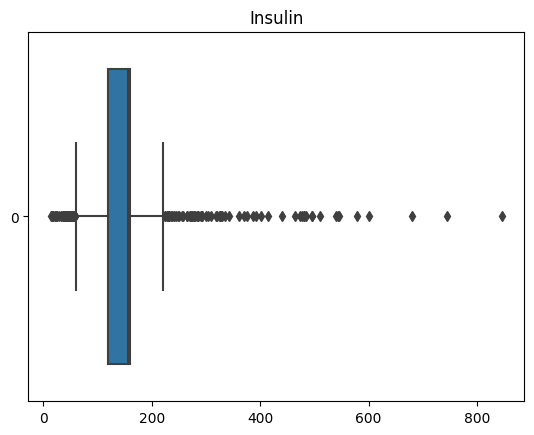

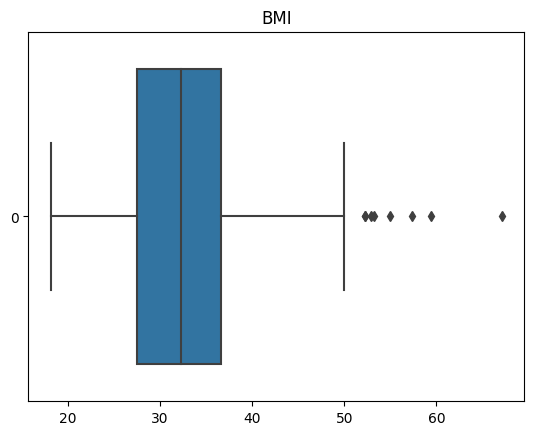

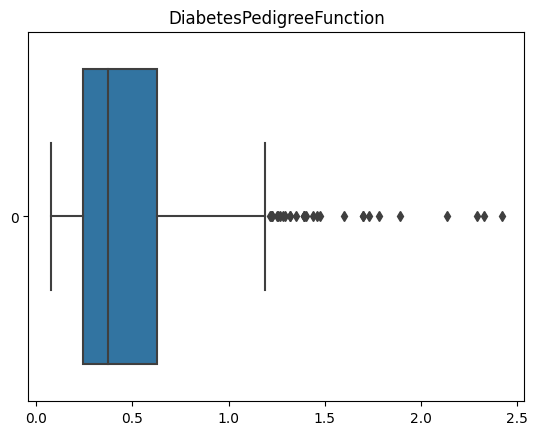

In [196]:
for i in ['Glucose', 'BloodPressure', 'Insulin', 'BMI', 'DiabetesPedigreeFunction']:
    plt.figure()
    sns.boxplot(
        data=df[i],
        orient='h'
    )
    plt.title(i)
    plt.show()
    

In [197]:
# 'Glucose', 'BloodPressure' -> Standart Scaler

x = df[['Glucose', 'BloodPressure']]

stdsclr.fit(x)
x_stdsclr = stdsclr.transform(x)
x_stdsclr = pd.DataFrame(x_stdsclr, columns=['Glucose_scaled', 'BloodPressure_scaled'])
display(x.head())
display(x_stdsclr.head())

,Glucose,BloodPressure
0,148.0,72.0
1,85.0,66.0
2,183.0,64.0
3,89.0,66.0
4,137.0,40.0


,Glucose_scaled,BloodPressure_scaled
0,0.866045,-0.033518
1,-1.205066,-0.529859
2,2.016662,-0.695306
3,-1.073567,-0.529859
4,0.504422,-2.680669


In [198]:
# 'Insulin', 'BMI', 'DiabetesPedigreeFunction' -> Robust Scaler

x = df[['Insulin', 'BMI','DiabetesPedigreeFunction']]

robstsclr.fit(x)
x_robstsclr = robstsclr.transform(x)
x_robstsclr = pd.DataFrame(x_robstsclr, columns=['Insulin_scaled', 'BMI_scaled','DiabetesPedigreeFunction_scaled'])
display(x.head())
display(x_robstsclr.head())

,Insulin,BMI,DiabetesPedigreeFunction
0,166.983218,33.6,0.627
1,155.341389,26.6,0.351
2,155.639070,23.3,0.672
3,94.000000,28.1,0.167
4,168.000000,43.1,2.288


,Insulin_scaled,BMI_scaled,DiabetesPedigreeFunction_scaled
0,0.281558,0.142857,0.665359
1,-0.007388,-0.626374,-0.056209
2,0.000000,-0.989011,0.783007
3,-1.529863,-0.461538,-0.537255
4,0.306795,1.186813,5.007843


In [199]:
df_new = pd.concat([x_minmax,x_stdsclr,x_robstsclr,df['Outcome']],axis=1)
display(df.head(),df_new.head())

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,166.983218,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.341389,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.639070,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


,Pregnancies_scaled,Age_scaled,Glucose_scaled,BloodPressure_scaled,Insulin_scaled,BMI_scaled,DiabetesPedigreeFunction_scaled,Outcome
0,0.352941,0.483333,0.866045,-0.033518,0.281558,0.142857,0.665359,1
1,0.058824,0.166667,-1.205066,-0.529859,-0.007388,-0.626374,-0.056209,0
2,0.470588,0.183333,2.016662,-0.695306,0.000000,-0.989011,0.783007,1
3,0.058824,0.000000,-1.073567,-0.529859,-1.529863,-0.461538,-0.537255,0
4,0.000000,0.200000,0.504422,-2.680669,0.306795,1.186813,5.007843,1


### MODELING

#### KNN

In [200]:
x = df_new[['Pregnancies_scaled', 'Glucose_scaled', 'BloodPressure_scaled', 'Insulin_scaled', 'BMI_scaled', 'DiabetesPedigreeFunction_scaled', 'Age_scaled']]
y = df_new['Outcome']

xtrain, xtest, ytrain, ytest = train_test_split(
    x,
    y,
    stratify= y
)

In [201]:
k = range(1,36,2)

train_score = []
test_score= []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)

    ypred_train = knn.predict(xtrain)
    train_score.append(accuracy_score(ytrain,ypred_train))

    ypred_test = knn.predict(xtest)
    acc_score = accuracy_score(ytest,ypred_test)
    test_score.append(acc_score)

    if score< acc_score:
        score = acc_score
        best_k = i

print (f'best K = {best_k}, score {score*100}%')


best K = 25, score 79.16666666666666%


In [202]:
knn_sc = KNeighborsClassifier(n_neighbors=25)
knn_sc.fit(xtrain,ytrain)
predKNN_sc = knn_sc.predict(xtest)

print(f'Akurasi KNN = {accuracy_score(ytest,predKNN_sc)*100}%')

Akurasi KNN = 79.16666666666666%


#### LOG REG

In [203]:
logReg = LogisticRegression()
logReg.fit(xtrain,ytrain)
predLogReg = logReg.predict(xtest)

print(f'Akurasi LogReg = {accuracy_score(ytest,predLogReg)*100}%')

Akurasi LogReg = 77.60416666666666%


#### DECISSION TREE

In [204]:
depths = range(1,25)
testing_accuracies = []
training_accuracies = []
score = 0

for i in depths:
  tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = i)
  tree.fit(xtrain,ytrain)

  y_predict_train = tree.predict(xtrain)
  training_accuracies.append(accuracy_score(ytrain,y_predict_train))

  y_predict_test = tree.predict(xtest)
  acc_score = accuracy_score(ytest,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    best_depth = i
    score = acc_score

print (f'best Depth = {best_depth}, score {score*100}%')

best Depth = 2, score 78.125%


#### SVC

In [205]:
kernel = ['sigmoid', 'rbf', 'poly', 'linear']
testing_accuracies = []
training_accuracies = []
score = 0

for i in kernel:
  SVM = SVC(kernel=i)
  SVM.fit(xtrain,ytrain)

  y_predict_train = SVM.predict(xtrain)
  training_accuracies.append(accuracy_score(ytrain,y_predict_train))

  y_predict_test = SVM.predict(xtest)
  acc_score = accuracy_score(ytest,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    best_depth = i
    score = acc_score

print (f'best Kernel = {best_depth}, score {score*100}%')

best Kernel = rbf, score 78.64583333333334%
